Here's a little script to do the spell checking on my markdown cells.

In [1]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check');
});

<IPython.core.display.Javascript object>

I decided to use the baseball data set for my project.  So I downloaded the data from seanlahman.com and started sifting through it to see what sort of data was available.  I was happy to discover lots of data.  Thinking a little about baseball and my Little League playing days, my primary position was the catcher.  I was a pretty decent ball player as I made a few all-star teams throughout my progression up the ranks until high school. When my baseball playing days were over I played slow pitch softball a few years after, but that's it.  Anyway back to being a catcher and frankly whenever I watch a MLB game I typically check out what the catcher's doing.  So I thought I would take a closer look at the catchers and perhaps do a top-10 list.  I started out by doing some general research about catchers and some of the 'best of' lists out there - I came across several 'greatest catchers of all time' lists.  I thought about a movie I saw a couple of years ago called Moneyball which was about the Oakland A's ball club and a general manager that used analytical means to assemble a competitive baseball team. [https://en.wikipedia.org/wiki/Moneyball].  I thought about building a top-10 list of: What are the top-10 MLB catchers that provided the greatest value their respective teams?

So I started poking around the baseball dataset just getting myself familiar with the lay of the land and what sort of data was available with respect to the catcher position.  I certainly don't consider myself an expert on baseball but this project was interesting to me and it certainly challenged my data wrangling ability by using Python - this is my first project with Python.  So I started doing some research on what the so-called MLB experts think constitutes a great MLB catcher.  My project will be focused more on the 'value' of a catcher to their respective team, which therefore would entail adding a monetary component, like salaries. Michael Haupert pinned a really nice article about MLB's annual salary leaders since 1874 [http://sabr.org/research/mlbs-annual-salary-leaders-1874-2012] illustrating how the annual maximum salaries began to skyrocket during the mid-80's from approximately 900K leveling off at about 33M dollars in 2009 and maintaining that level through 2016.  This article also cites the lack of MLB salary data before 1985, noting "salary data before this date are hard to come by and that over the years numerous sources have reported player salaries in small quantities with little reliability".  And this information coincides with the seanlahman.com data set in that the salaries given only go back to 1985.  Therefore based on this revelation I have amended my to the following which I will be pursuing for this project:

__What are the top-10 MLB catchers that provided the greatest yearly value to their respective teams from 1985 to 2014?__ 

So I set up the environment using Pandas and Numpy and loaded the dataset, started doing some wrangling see further investigate how to approach the answers to these questions.  I'll start by separating the catchers from the rest of the players and analyze what is happening with them only.  The dataset provides two tables with position data; Fielding and Appearances.  I used both CSV files to develop the list of catchers by playerID, and to cross check each other to ensure that the final list matched between the two (this analysis can be found in the file named '2017_03_27_P2_final_report_working').

This code uses the Fielding.csv to gather the list of unique playerID for catchers only.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = 'c:/python27/cwt_classes/P2_investigate_dataset/baseball_dataset/'
fielding = pd.read_csv(path + 'Fielding.csv')
appearances = pd.read_csv(path + 'Appearances.csv')
salaries = pd.read_csv(path + 'Salaries.csv')
batting = pd.read_csv(path + 'Batting.csv')
master = pd.read_csv(path + 'Master.csv')

#taking the field dataframe and filtering on all cathcers 'C' and the year >= 1985 
catchers_only_1985 = fielding[(fielding['POS'] == 'C') & (fielding['yearID']>= 1985)]

#drop the duplicate playerIDs and generate the list of unique playerIDs for the catchers only
catchers_only_playerIDs = catchers_only_1985.loc[:,['playerID']].drop_duplicates()

Now lets start dissecting the salary data and look at some comparisons.  We'll first do a comparison between the salaries of all positions versus just the catcher position.  

In [3]:
#rename the salary column of all salaries so it can be identified in the legend of the graphs, get max and median
all_salaries = salaries.rename(columns = {'salary':'all_salaries'})
max_salaries_all = all_salaries.groupby('yearID')['all_salaries'].max()
median_salaries_all = all_salaries.groupby('yearID')['all_salaries'].median()

#merge catchersalaries dataframe to one with catchers only

catcher_salaries = pd.merge(catchers_only_playerIDs, salaries, on='playerID')

#rename the salary column of catchers salaries so it can be identified in the legend of the graphs, get max and median
catcher_salaries = catcher_salaries.rename(columns = {'salary':'catcher_salaries'})
max_salaries_catchers = catcher_salaries.groupby('yearID')['catcher_salaries'].max()
median_salaries_catchers = catcher_salaries.groupby('yearID')['catcher_salaries'].median()

#combine the duplicate playerIDs because some players have more than one stint during a single year
catcher_salaries = catcher_salaries.groupby(['yearID', 'playerID'], as_index = False).sum()

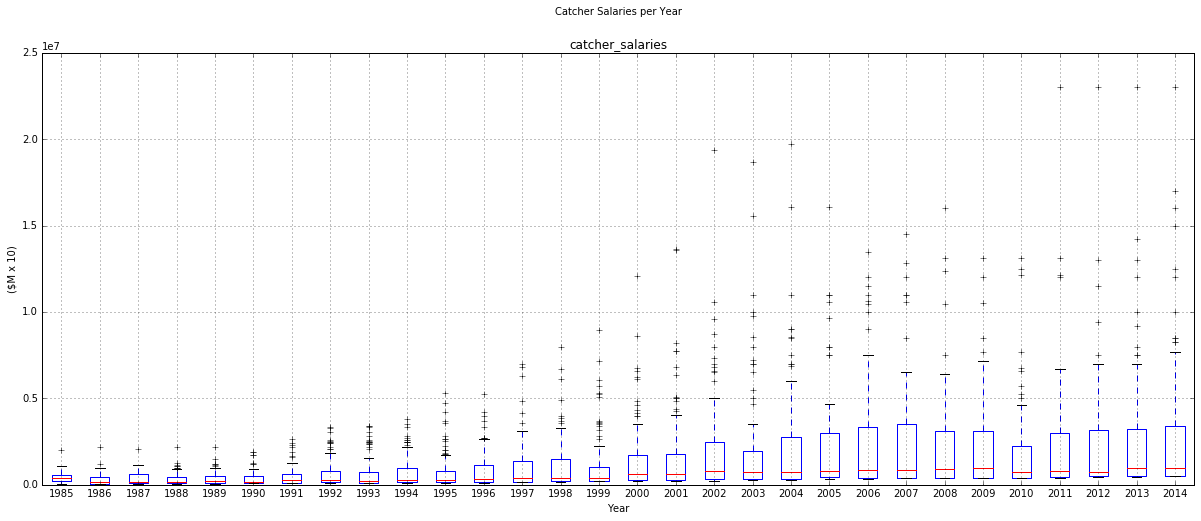

In [4]:
%matplotlib inline
#http://stackoverflow.com/questions/26255876/python-default-settings-for-plt-pyplot-boxplot

bp = catcher_salaries.boxplot(by='yearID', figsize=(20,8))
bp.set(xlabel="Year", ylabel="($M x 10)")
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Catcher Salaries per Year')

Reviewing the boxplot of the catcher salaries really illustrates the variability of the salaries since 1985, and we can see the explosion in the outlier salaries after 2000.  One striking revelation from this information is the median salaries have not increased as significantly over time as the top 25% of the salary range - furthermore the increase of the inter-quartile range is apparent after 2002 however still showing the median salaries at the bottom end of this range.  This indicates that although some catchers are making some pretty good salaries the overall movement of catcher salaries have been relatively flat over this 30 year span of time. So I'm now wondering how the median salary of the catchers compares to the median salaries of all other positions.  So we'll take a look at this in the next sequence.

__This plot also brings out the outliers.  I wonder if the outlier catchers were worth their billing?  Were there some duds in this set that perhaps made more than their relative worth to the ballclub for a particular year?  I think I will include in my analysis a look at the outliers only and determine if the outliers were a good value to the club for a particular year.__           

So let's now how the catcher salaries match up with all player salaries.

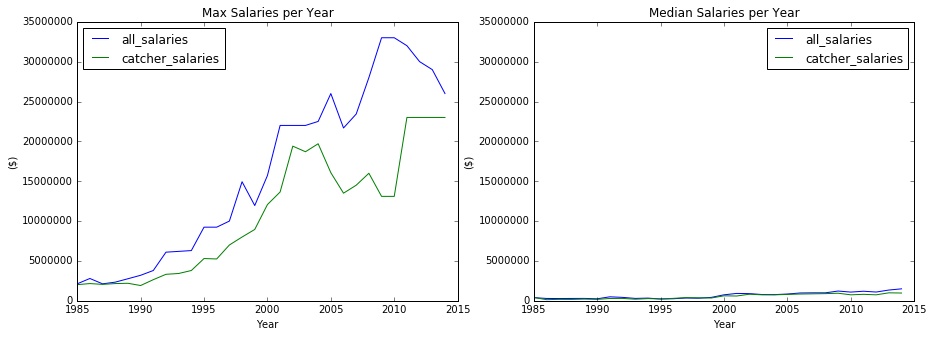

In [5]:
%matplotlib inline

#ref: http://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell

fig, axs = plt.subplots(1,2,figsize=(15,5))

my_plot_max = max_salaries_all.plot(kind='line', ax=axs[0], xlim=(1985, 2015), ylim=(0, 35000000), legend=True, title='Max Salaries per Year')
my_plot_max = max_salaries_catchers.plot(kind='line', ax=axs[0], xlim=(1985, 2015), legend=True)
my_plot_max.set(xlabel="Year", ylabel="($)")
my_plot_max.ticklabel_format(style='plain')

my_plot_med = median_salaries_all.plot(kind='line', ax=axs[1], xlim=(1985, 2015), ylim=(0, 35000000), legend=True, title='Median Salaries per Year')
my_plot_med = median_salaries_catchers.plot(kind='line', ax=axs[1], xlim=(1985, 2015), legend=True)
my_plot_med.set(xlabel="Year", ylabel="($)")
my_plot_med.ticklabel_format(style='plain')

I look at both max salaries and median salaries - I wanted to also compare the relative difference between the max and median so I forced the y-scale to be the same for both cases.

The two line graphs compares the catcher salaries with all MLB salaries from 1985 to 2014.  The graph on the left, Max Salaries per Year, indicates the overall trend of the explosion salaries also included the catchers, however a catcher has never been the highest paid player in the league.  From 1985 until the year 2004 the max salaries of catchers tracked all players, however from 2005 to 2011 max salaries for catchers declined while max salaries for other position continued to increase.  For the graph on the right, Median Salaries per Year, the most revealing point is this median salaries pales in comparison with the max salaries.

Okay, going back to the analysis of the catchers.  We take the entire list of catchers and look at the salary data.  I want to standardize the catcher salaries per year.  We'll use this standardized catcher salaries number to compare salaries in different years - coming later in the analysis. 

In [6]:
#http://stackoverflow.com/questions/26046208/normalize-dataframe-by-group
#http://stackoverflow.com/questions/13854476/pandas-transform-doesnt-work-sorting-groupby-output/13854901#13854901
#add a column for the standardized catcher salary
catcher_salaries['catcher_salaries_std'] = catcher_salaries.groupby('yearID').transform(lambda x: (x - x.mean()) / x.std())
catcher_salaries = catcher_salaries.sort_values(by=['yearID','catcher_salaries_std'],ascending=[1,0])

Now we move to the catcher performance measurements.  As I mentioned before, I've researched several 'all-time best of' lists on catchers and it's interesting how many unique qualities a top-notch catcher has to possess as compared to the other players on the club.  Durability and offensive statistics are a couple of measures that resonated among the various analysis cited, so I based my catcher performance analysis on these two measures.  I recognize that judging the performance of a catcher only on these two measures would not tell the whole story on the overall effectiveness of a catcher.  For example defensive stats would be necessary in the evaluation.  Honors such as Golden Glove, Silver Slugger, All-star game, MVP, etc. could be included in the evaluation.  Having command of the pitching staff was common thread in the evaluations.  Compartmentalization was also mentioned, meaning the ability to perform well on both offense and defense with the added responsibility of managing the pitching staff.  

**Catcher's Durability**

Durability is one of the attributes of a good catcher.  To measure durability we look at the number of games a catcher played during a year.  We use the Appearances.csv file to extract this number.

In [7]:
#merge and filter to get the number of game played per year for the catchers >= 1985 and > 20games
catcher_appearances = pd.merge(catchers_only_playerIDs, appearances,on='playerID')
catcher_appearances = catcher_appearances[(catcher_appearances['yearID'] >= 1985)]
catcher_appearances = catcher_appearances[(catcher_appearances['G_all'] > 20)]
catcher_appearances = catcher_appearances[['yearID','playerID','G_all']]
catcher_appearances = catcher_appearances.groupby(['yearID', 'playerID'], as_index = False).sum()

#add column for the standardized durability
catcher_appearances['Durability_std'] = catcher_appearances.groupby('yearID').transform(lambda x: (x - x.mean()) / x.std())
catcher_appearances = catcher_appearances.sort_values(by=['yearID','G_all'],ascending=[1,0])

**Catcher's Offensive Stats**

Now lets take a look at the Offensive Statistics of the catchers for each year.  I'm only interested in the batting statistics from 1985 to the most recent data, also I'm not interested in any batting statistics with less than 20 at bats for the year.  As I think anyone with less than 20 at bats would have skewed batting numbers.

Summing the total of the On-Base-Percentage(OBP), Slugging Percentage(SLG), and Batting Average(AVG) to determine the measure for the catcher's offensive performance.  I then standardize the offensive performance so I can compare it over multiple years.

**OBP = On Base Percentage**

OBP = (H + BB + IBB + HBP) / (BB + IBB + HBP + AB + SF + SH)

**SLG = Slugging Percentage**

SLG = (H + 2B + (2 x 3B) + (3 x HR)) / AB

**AVG = Batting Average**

AVG = (H + 2B + 3B + HR) / AB

In [8]:
#merge playerID and batting dataframes to use the stats for the offensive performance calculation
#and filter for >= 1985 and at bats >= 20
catcher_batting = pd.merge(catchers_only_playerIDs, batting, on='playerID')
catcher_batting = catcher_batting[(catcher_batting['yearID']>= 1985)]
catcher_batting = catcher_batting[(catcher_batting['AB'] >= 20)]

#prepare the dataframe for the OBP calculation by filtering for only the columns needed
catcher_batting_obp = catcher_batting[['playerID','yearID','H','BB','IBB','HBP','AB','SF','SH']]
catcher_batting_obp = catcher_batting_obp.groupby(['yearID', 'playerID'], as_index = False).sum()

#add the OBP result to the dataframe
catcher_batting_obp['OBP'] = (catcher_batting_obp.loc[:,'H':'HBP'].sum(axis=1)) / (catcher_batting_obp.loc[:,'BB':'SH'].sum(axis=1))

#prepare the dataframe for the SLG calculation by filtering for only the columns needed
catcher_batting_slg = catcher_batting[['playerID','yearID','H','2B','3B','HR','AB']]
catcher_batting_slg = catcher_batting_slg.groupby(['yearID', 'playerID'], as_index = False).sum()

#add the SLG result to the dataframe
catcher_batting_slg['SLG'] = (catcher_batting_slg.loc[:,'H'] + (2 * catcher_batting_slg.loc[:,'2B']) + (3 * catcher_batting_slg.loc[:,'3B']) + (4 * catcher_batting_slg.loc[:,'HR']))/(catcher_batting_slg.loc[:,'AB'])

#prepare the dataframe for the AVG calculation by filtering for only the columns needed
catcher_batting_avg = catcher_batting[['playerID','yearID','H','2B','3B','HR','AB']]
catcher_batting_avg = catcher_batting_avg.groupby(['yearID', 'playerID'], as_index = False).sum()

#add the AVG result to the dataframe
catcher_batting_avg['AVG'] = (catcher_batting_avg.loc[:,'H':'HR'].sum(axis=1)) / (catcher_batting_avg.loc[:,'AB'])

**Combine the 3 Offensive stats**

Offensive performance = OBP + SLG + AVG, then standardize per year so we can compare the years. 

In [9]:
#reduce/merge the 3 dataframes together into one dataframe
#http://stackoverflow.com/questions/23668427/pandas-joining-multiple-dataframes-on-columns
#Edit August 1, 2016: For those using Python 3: reduce has been moved into functools.
#So to use this function, you'll first need to import that module.
dfs = [catcher_batting_avg, catcher_batting_slg, catcher_batting_obp]
catcher_offensive_stats = reduce(lambda left,right: pd.merge(left,right,on=['playerID', 'yearID']), dfs)
catcher_offensive_stats = catcher_offensive_stats[['playerID','yearID','AVG','SLG','OBP']]
catcher_offensive_stats = catcher_offensive_stats[(catcher_offensive_stats['yearID']>= 1985)]
catcher_offensive_stats = catcher_offensive_stats[catcher_offensive_stats.AVG.notnull()]
catcher_offensive_stats = catcher_offensive_stats[catcher_offensive_stats.SLG.notnull()]
catcher_offensive_stats = catcher_offensive_stats[catcher_offensive_stats.OBP.notnull()]

#sum AVG, SLG, and AVG to get the total offensive stat
catcher_offensive_stats['total'] = catcher_offensive_stats['AVG'] + catcher_offensive_stats['SLG'] + catcher_offensive_stats['OBP']
catcher_offensive_stats = catcher_offensive_stats[['yearID', 'playerID', 'total']]

#add new column to the dataframe with the standardized offensive rank
catcher_offensive_stats['Offensive_Rank_std'] = catcher_offensive_stats.groupby('yearID').transform(lambda x: (x - x.mean()) / x.std())
catcher_offensive_stats = catcher_offensive_stats.sort_values(by=['yearID','Offensive_Rank_std'],ascending=[1,0])

#merge all standardized measures into one dataframe - salaries, durability, and offensive rank - called final_analysis
dfs = [catcher_salaries, catcher_appearances, catcher_offensive_stats]
final_analysis = reduce(lambda left,right: pd.merge(left,right,on=['yearID', 'playerID']), dfs)
final_analysis = final_analysis[['yearID','playerID','catcher_salaries_std','Durability_std','Offensive_Rank_std']]
final_analysis = final_analysis.sort_values(by=['yearID', 'catcher_salaries_std'],ascending=[1,0])

#calculate the composite_measure: composite_measure = 50%(offensive_rank) + 50%(durability)
final_analysis['composite_measure'] = (final_analysis['Durability_std'] * 0.5) + (final_analysis['Offensive_Rank_std'] * 0.5)

#dataframe that defines the greatest value to their respective teams as those catchers that have the lowest
#salaries and the highest performance
catchers_w_greatest_value = final_analysis[(final_analysis['composite_measure'] >= 1.5) & (final_analysis['catcher_salaries_std'] <= -0.25)]

In [10]:
#merge the 3 offensive stats together into one dataframe
dfs = [catcher_batting_avg, catcher_batting_slg, catcher_batting_obp]
offensive_triad = reduce(lambda left,right: pd.merge(left,right,on=['playerID', 'yearID']), dfs)
offensive_triad = offensive_triad[['playerID','yearID','AVG','SLG','OBP']]

#generated new dataframe with the 3 stats prepared to graph
yearly = pd.DataFrame()
yearly['batting average'] = offensive_triad.groupby(['yearID'])['AVG'].mean()
yearly['on-base percentage'] = offensive_triad.groupby(['yearID'])['OBP'].mean()
yearly['slugging percentage'] = offensive_triad.groupby(['yearID'])['SLG'].mean()

Taking a look at the variation of the mean of the offensive stats (AVG, OBP, and SLG) from 1985 to 2014.  These stats maintain a fair amount of consistency over the years in this study.   

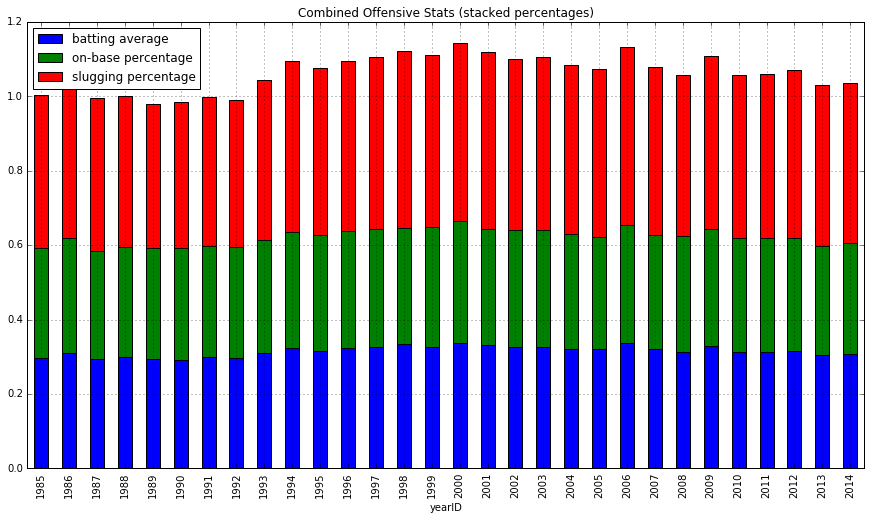

In [31]:
yearly[['batting average','on-base percentage','slugging percentage']].plot(kind='bar', stacked=True, figsize=(15,8), grid='on', title='Combined Offensive Stats (stacked percentages)')

Now that I have all the pertinent data gathered to answer some of my initial questions lets take a look at:

**What are the top-10 MLB catchers that provided the greatest yearly value to their respective teams from 1985 to 2014?**

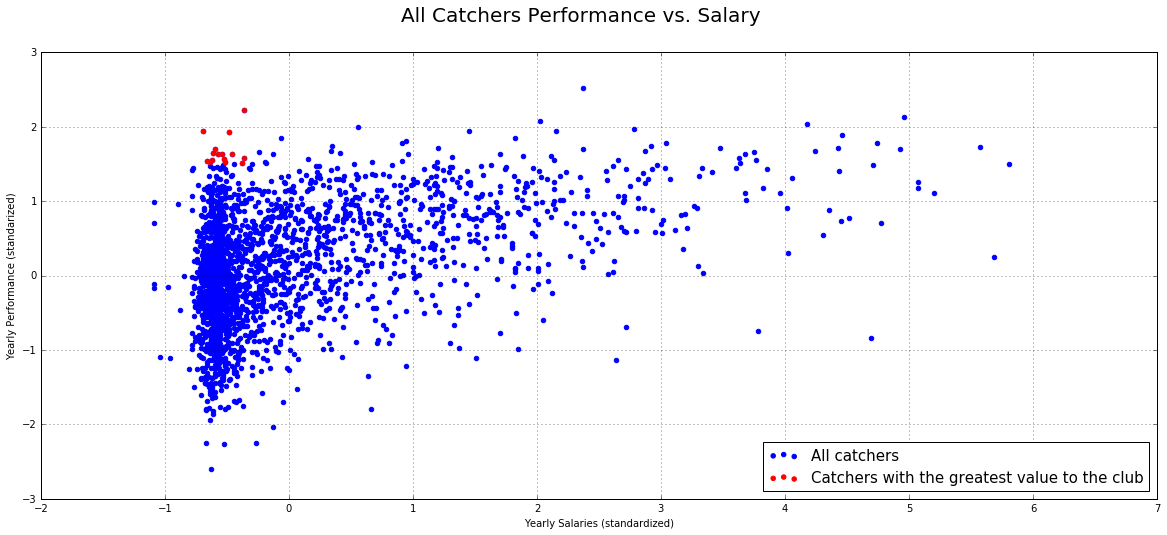

In [12]:
#scatter plot identifying the outliers less than the population mean for the respective year
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(final_analysis.catcher_salaries_std,final_analysis.composite_measure, color='blue', label='All catchers')
ax.scatter(catchers_w_greatest_value.catcher_salaries_std,catchers_w_greatest_value.composite_measure, color='red', label='Catchers with the greatest value to the club')
ax.legend(loc='lower right', fontsize=15)
ax.set(xlabel='Yearly Salaries (standardized)', ylabel='Yearly Performance (standarized)')
fig.suptitle('All Catchers Performance vs. Salary', fontsize=20)
plt.grid()

This scatter plot shows the relationship between performance and salaries for all catchers between the years of 1985 and 2014.  Each dot represents a unique catcher/year pair, for example of a catcher had a 10 year career during these years then there would be 10 specific dots.

My initial observation that strikes me from this graph is the clustering of dots around the -0.5 to -0.6 standardized salary range.  This appears to be the minimum range of salaries the catcher position commands in MLB.  Sure there are some outliers to the negative side from there but for the most part this looks like the minimum you can get for a catcher.

I use this plot to determine the top catchers that have created the most value for their respective ball clubs.  The greatest value would be those years which a catcher performed at the highest level but with the lowest salary.  The red dots have defined those instances.

Now let's run some code to reveal the players and the years.

In [13]:
#adding a column to the dataframe called 'top_valued_catchers'
catchers_w_greatest_value['top_valued_catchers'] = catchers_w_greatest_value['composite_measure'].rank(ascending=0)
catchers_w_greatest_value = catchers_w_greatest_value[['playerID','yearID','catcher_salaries_std','composite_measure','top_valued_catchers']]

#get the first and last names of the catchers on the 'dud' list
catchers_w_greatest_value_names = pd.merge(catchers_w_greatest_value, master, on=['playerID'])
catchers_w_greatest_value_names = catchers_w_greatest_value_names[['playerID', 'nameFirst', 'nameLast', 'yearID', 'catcher_salaries_std', 'composite_measure', 'top_valued_catchers']]
catchers_w_greatest_value_names_1 = catchers_w_greatest_value_names.sort_values(by='composite_measure',ascending=0)

#add teamID column
player_year_team = fielding[['playerID', 'yearID', 'teamID']]
catchers_w_greatest_value_addTeam = pd.merge(catchers_w_greatest_value_names_1,player_year_team,on=['playerID', 'yearID'])
catchers_w_greatest_value_addTeam_1 = catchers_w_greatest_value_addTeam.sort_values(by='composite_measure',ascending=0)
catchers_w_greatest_value_addTeam_1 = catchers_w_greatest_value_addTeam_1.drop_duplicates()

C:\Python27\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
catchers_w_greatest_value_addTeam_1

,playerID,nameFirst,nameLast,yearID,catcher_salaries_std,composite_measure,top_valued_catchers,teamID
0,greenmi01,Mike,Greenwell,1988,-0.363723,2.227964,1.0,BOS
4,sandopa01,Pablo,Sandoval,2009,-0.695962,1.947216,2.0,SFN
7,poseybu01,Buster,Posey,2012,-0.479886,1.925979,3.0,SFN
11,donaljo02,Josh,Donaldson,2013,-0.598214,1.706750,4.0,OAK
12,piazzmi01,Mike,Piazza,1993,-0.611956,1.646636,5.0,LAN
14,avilaal01,Alex,Avila,2011,-0.538956,1.639331,6.0,DET
19,sheetla01,Larry,Sheets,1987,-0.571767,1.634076,7.0,BAL
21,mccanbr01,Brian,McCann,2008,-0.456409,1.632402,8.0,ATL
22,hoilech01,Chris,Hoiles,1993,-0.364668,1.582417,9.0,BAL
24,sweenmi01,Mike,Sweeney,1999,-0.523943,1.566046,10.0,KCA


This answers the question: What are the top-10 MLB catchers that provided the greatest yearly value to their respective teams from 1985 to 2014?  This table reveals the top-10 and the number one catcher that provided the greatest yearly value was Mike Greenwell in 1988 who was playing for the Boston Red Sox.

**Find the Outliers**

So now that I'm going to analyze only the outliers, to do this I'll need to identify the playerIDs that are outliers.  From our statistics background we know an outlier is < Q1 - 1.5(IQR) or > Q3 + 1.5(IQR), where Q1&Q3 are the 25 and 75 percentiles respectively, and IQR is the interquartile range (Q3 - Q1).  For this analysis I'm only interested in the upper outlier range. The next sequence of code gathers the salary level for each year that represents outlier threshold. Then in the following sequence the playerIDs which account for the outliers are identified.      

In [15]:
#calculate the threshold which identifies the outliers
quant = catcher_salaries.groupby('yearID')['catcher_salaries'].quantile([.25, .75])
outliers = pd.DataFrame(quant)
outliers = outliers.unstack()
outliers['catcher_salaries','Outlier_if_above'] = ((outliers['catcher_salaries',0.75] - outliers['catcher_salaries',0.25]) * 1.5) + outliers['catcher_salaries',0.75]
outliers_1 = outliers.reset_index()
outliers_2 = outliers_1.drop([0.25, 0.75], axis=1, level=1)
outliers_2.columns = outliers_2.columns.droplevel(1)

#merge salaries with outliers to get dataframe with catcher outlier playerIDs
catcher_outliers = pd.merge(catcher_salaries, outliers_2, on=['yearID'])
catcher_outliers = catcher_outliers.ix[(catcher_outliers['catcher_salaries_x']) >= (catcher_outliers['catcher_salaries_y'])]
catcher_outliers = catcher_outliers.sort_values(by=['yearID', 'catcher_salaries_std'],ascending=[1,0])

**Catcher Performance vs. Catcher Salary**

In [16]:
#merge the catcher outliers with the final analysis dataframe to combine the 3 standaridized values 
outlier_final_analysis = pd.merge(catcher_outliers, final_analysis, on=['yearID', 'playerID'])
outlier_final_analysis = outlier_final_analysis[['yearID', 'playerID', 'catcher_salaries_std_x', 'Durability_std', 'Offensive_Rank_std']]
outlier_final_analysis_1 = outlier_final_analysis.sort_values(by='catcher_salaries_std_x',ascending=0)

#calculate the composite_measure: composite_measure = 50%(offensive_rank) + 50%(durability)
outlier_final_analysis_1['composite_measure'] = (outlier_final_analysis_1['Durability_std'] * 0.5) + (outlier_final_analysis_1['Offensive_Rank_std'] * 0.5)

#dataframe that defines the duds as those catchers who are outliers and have a 
#composite performance measure of less than the mean
outlier_greater_than_mean = outlier_final_analysis_1[(outlier_final_analysis_1['composite_measure'] > 0)]
outlier_less_than_mean = outlier_final_analysis_1[(outlier_final_analysis_1['composite_measure'] <= 0)]

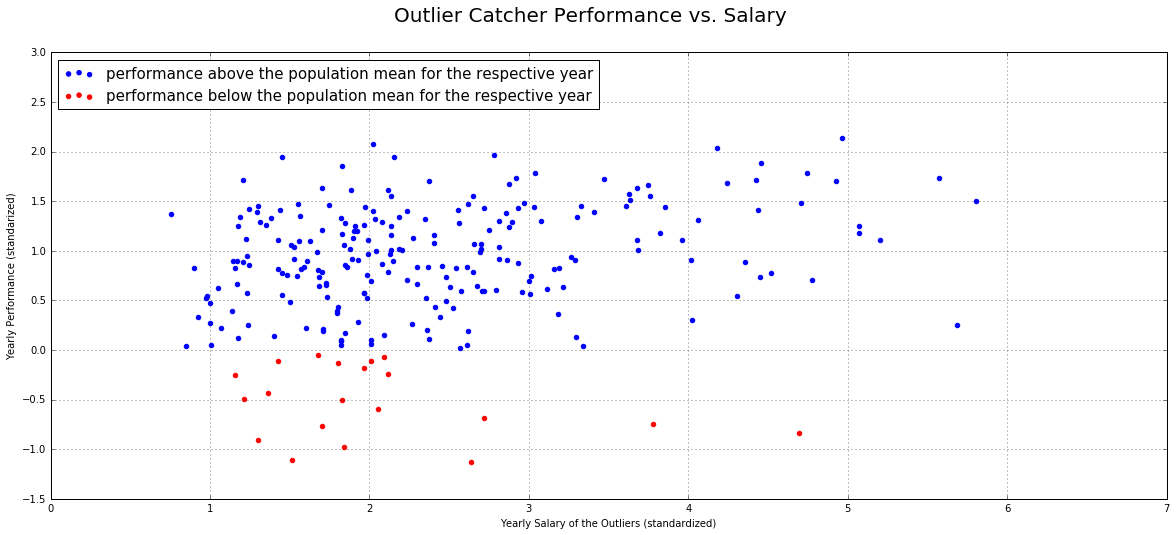

In [17]:
#scatter plot identifying the outliers less than the population mean for the respective year
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(outlier_greater_than_mean.catcher_salaries_std_x,outlier_greater_than_mean.composite_measure, color='blue', label='performance above the population mean for the respective year')
ax.scatter(outlier_less_than_mean.catcher_salaries_std_x,outlier_less_than_mean.composite_measure, color='red', label='performance below the population mean for the respective year')
ax.legend(loc='upper left', fontsize=15)
ax.set(xlabel='Yearly Salary of the Outliers (standardized)', ylabel='Yearly Performance (standarized)')
fig.suptitle('Outlier Catcher Performance vs. Salary', fontsize=20)
plt.grid()

**The Duds**

Duds are defined as those catchers that are have a salary level with a year high enough that it is considered an outlier however does not have a performance within that same year that is above the mean.  The Duds are ranked based on the standardized salary.  

In [18]:
#adding a column to the dataframe called 'Dud_Rank', also add 'teamID' to the dataframe
outlier_less_than_mean['Dud_Rank'] = outlier_less_than_mean['catcher_salaries_std_x'].rank(ascending=0)
outlier_less_than_mean = outlier_less_than_mean[['playerID','yearID','catcher_salaries_std_x','composite_measure','Dud_Rank']]

#merge with master list to get the first and last names of the catchers on the 'dud' list
outlier_less_than_mean_names = pd.merge(outlier_less_than_mean, master, on=['playerID'])
outlier_less_than_mean_names = outlier_less_than_mean_names[['playerID', 'nameFirst', 'nameLast', 'yearID', 'catcher_salaries_std_x', 'composite_measure', 'Dud_Rank']]
outlier_less_than_mean_names_1 = outlier_less_than_mean_names.sort_values(by='catcher_salaries_std_x',ascending=0)

#prepare a list with the playerID and teamID per year
player_year_team = fielding[['playerID', 'yearID', 'teamID']]

#merge the outlier playerIDs with the teamID and add teamID column
outlier_less_than_mean_addTeam = pd.merge(outlier_less_than_mean_names_1, player_year_team, on=['playerID', 'yearID'])
outlier_less_than_mean_addTeam_1 = outlier_less_than_mean_addTeam.sort_values(by='catcher_salaries_std_x',ascending=0)
outlier_less_than_mean_addTeam_1 = outlier_less_than_mean_addTeam_1.drop_duplicates()

C:\Python27\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
outlier_less_than_mean_addTeam_1

,playerID,nameFirst,nameLast,yearID,catcher_salaries_std_x,composite_measure,Dud_Rank,teamID
0,cartega01,Gary,Carter,1989,4.691563,-0.835713,1.0,NYN
2,boonebo01,Bob,Boone,1990,3.780605,-0.745947,2.0,KCA
3,greenmi01,Mike,Greenwell,1992,2.719120,-0.688198,3.0,BOS
7,hundlto01,Todd,Hundley,1998,2.638971,-1.131843,4.0,NYN
9,kennete02,Terry,Kennedy,1988,2.119600,-0.237203,5.0,BAL
10,hernara02,Ramon,Hernandez,2009,2.092249,-0.066384,6.0,CIN
13,whitter01,Ernie,Whitt,1990,2.051932,-0.594889,7.0,ATL
14,gedmari01,Rich,Gedman,1989,2.007678,-0.106184,8.0,BOS
15,lopezja01,Javy,Lopez,2006,1.964704,-0.181184,9.0,BAL
16,lopezja01,Javy,Lopez,2006,1.964704,-0.181184,9.0,BOS


**Conclusions and Observations**

So here we have the list of the catchers that were the greatest duds for their respective ball clubs.  By duds I mean the ones who made the highest salaries and performed the worst for that particular year.  Based on my analysis Gary Carter's 1989 year was the greatest dud year of any MLB catcher.  Gary made $2,198,572 in 1989 but only played in 50 games, his on-base percentage was a very low at .241, his slugging percentage was .340, and his batting average was .248.

Notice this list of duds are really just those with performance below the mean for the year, sorted by salary.  Therefore the ranking could be a little skewed.  For example, you could make a strong case that the year Todd Hundley had in 1998 with the Mets was more of a dud than Mike Greenwell's 1992 season with the Red Sox.  And speaking of Mike Greenwell, recall that Mike Greenwell's 1988 season was the greatest value season for a catcher.  In 1988 Greenwell's performance was greater than 2 standard deviations better then the population mean and his salary for that year was less than the mean.  Glad to see that he made more money by the time 1992 came around.  Actually if we look at Greenwell's career as the table below does, we see Greenwell started making some serious money in 1990, where he commanded a salary that was better than two standard deviations above the mean - and never went below that for the rest of his career.  Also I found it interesting that Greenwell played only for the Red Sox.  

Looking at the numbers, generally the primary reason for a dud season is the player got injured and they didn't play much.  Which of course would severely effect durability stat.

Also finding the duds by filtering the performance values that are less than the mean might exclude some outliers that should be on the top list.  For example Joe Mauer's 2011 season when he made $23M and only had a performance stat of .25 above the mean, you could make a strong case for this season to be high on the dud list.

I recognize that judging the performance of a catchers based only on durability and offensive stats would not tell the whole story on the overall effectiveness of a catcher. For example defensive stats would be necessary in the evaluation. Honors such as Golden Glove, Silver Slugger, All-star game, MVP, etc. could be included in the evaluation. Having command of the pitching staff was common thread in the evaluations. Compartmentalization was also mentioned, meaning the ability to perform well on both offense and defense with the added responsibility of managing the pitching staff.  Another point to make about my performance measurements - I weighted the two as equal, meaning durability and offensive stats had the same impact on the composite measure.  The optimum performance measurement may not necessary be one that considers these two parameter with equal weights.

Also whenever we talk about money over a long period of time like here (30 years) then we always have the possiblity that inflation maybe a factor to consider.  This analysis does not take into account the factor of inflation. However I looked at the consumer price index (CPI) from 1985 to 2015. The max salary in 1985 was 2,130,300, with inflation that amount would be 4,692,204 in 2015 - noting the max salary in 2014 was 26,000,000.   So when comparing the salaries of the outliers over the 30 years the factor for inflation should be considered however it is minimal.  

In [20]:
greenwell_career = final_analysis.loc[lambda df: df['playerID'] == 'greenmi01', :]

#add teamID column
greenwell_career_addTeam = pd.merge(greenwell_career, player_year_team, on=['playerID', 'yearID'])
greenwell_career_addTeam_1 = greenwell_career_addTeam.sort_values(by='yearID',ascending=1)
greenwell_career_addTeam_1 = greenwell_career_addTeam_1.drop_duplicates()
greenwell_career_addTeam_1

,yearID,playerID,catcher_salaries_std,Durability_std,Offensive_Rank_std,composite_measure,teamID
0,1986,greenmi01,-0.722465,-1.362514,0.710997,-0.325758,BOS
4,1988,greenmi01,-0.363723,2.057199,2.398729,2.227964,BOS
8,1989,greenmi01,0.343962,1.790905,1.690700,1.740802,BOS
11,1990,greenmi01,2.113671,1.945823,1.277263,1.611543,BOS
14,1991,greenmi01,3.608042,1.778924,1.123943,1.451434,BOS
16,1992,greenmi01,2.719120,-0.791848,-0.584548,-0.688198,BOS
19,1993,greenmi01,3.030028,1.473709,1.413588,1.443649,BOS
23,1994,greenmi01,2.690649,1.078267,0.899766,0.989017,BOS
25,1995,greenmi01,2.700543,1.248609,0.891645,1.070127,BOS
29,1996,greenmi01,2.617891,-0.350523,0.729899,0.189688,BOS


**References**

https://sabr.org/research/baseball-s-major-salary-milestones

http://www.baseball-reference.com/

http://beneathdata.com/blog/does-money-buy-wins-in-baseball/

http://www.wikihow.com/Calculate-a-Batting-Average

https://www.google.com/#q=Jupyter+Notebook+Spell+Check+Extension+Installation+-+YouTube.htm

http://www.randalolson.com/2017/01/10/machine-learning-madden-nfl-how-madden-player-ratings-are-actually-calculated/

http://sabr.org/research/mlbs-annual-salary-leaders-1874-2012

http://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers

Qualities of an Excellent Catcher - Baseball The Magazine

http://www.cbssports.com/mlb/news/ranking-the-best-15-catchers-in-major-league-baseball-for-2016/

http://www.seanlahman.com/baseball-archive/statistics/

http://www.hardballtimes.com/what-is-zone-rating/

